In [4]:
# Python
import numpy as np
import pandas as pd
from prophet import Prophet
from scipy import stats

In [3]:
!pip install scipy

     ---------------------------------------- 0.0/42.5 MB ? eta -:--:--
     ---------------------------------------- 0.2/42.5 MB 4.6 MB/s eta 0:00:10
      --------------------------------------- 1.0/42.5 MB 12.5 MB/s eta 0:00:04
     -- ------------------------------------- 2.3/42.5 MB 16.2 MB/s eta 0:00:03
     --- ------------------------------------ 3.5/42.5 MB 20.4 MB/s eta 0:00:02
     --- ------------------------------------ 4.2/42.5 MB 20.6 MB/s eta 0:00:02
     --- ------------------------------------ 4.2/42.5 MB 20.6 MB/s eta 0:00:02
     --- ------------------------------------ 4.2/42.5 MB 20.6 MB/s eta 0:00:02
     ---- ----------------------------------- 4.5/42.5 MB 12.6 MB/s eta 0:00:04
     ---- ----------------------------------- 4.9/42.5 MB 12.0 MB/s eta 0:00:04
     ----- ---------------------------------- 5.4/42.5 MB 11.9 MB/s eta 0:00:04
     ----- ---------------------------------- 5.8/42.5 MB 12.0 MB/s eta 0:00:04
     ----- ---------------------------------- 6.1


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\Kearns\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
try:
    df = pd.read_csv(r'C:\Users\Kearns\Downloads\Final_Project-master\Final_Project-master\pmn_data.csv')
except:
    print("well that didn't work...")

In [11]:
print(df['spec_name'].mode()) # Coscinodiscus morphotype is the modal phytoplankton with 1482 samples
x = df.loc[(df['sampl_site'] == 'GA - Skidaway River') &  (df['spec_name'] == 'Coscinodiscus morphotype')]
x = x[(np.abs(stats.zscore(df['y'])) < 3)]
y = df.loc[(df['sampl_site'] == 'GA - Terry Creek') & (df['spec_name'] == 'Coscinodiscus morphotype')]
y = y[(np.abs(stats.zscore(df['y'])) < 3)]
z = df.loc[(df['sampl_site'] == 'GA - St. Marys River Waterfront Park') & (df['spec_name'] == 'Coscinodiscus morphotype')]
z = z[(np.abs(stats.zscore(df['y'])) < 3)]

a = df.loc[(df['sampl_site'] == 'GA - North River Boat Landing') &  (df['spec_name'] == 'Coscinodiscus morphotype')]
a = a[(np.abs(stats.zscore(df['y'])) < 3)]
b = df.loc[(df['sampl_site'] == 'GA - Clam Creek River') & (df['spec_name'] == 'Coscinodiscus morphotype')]
b = b[(np.abs(stats.zscore(df['y'])) < 3)]
c = df.loc[(df['sampl_site'] == 'GA - Baywood Dock') & (df['spec_name'] == 'Coscinodiscus morphotype')]
c = c[(np.abs(stats.zscore(df['y'])) < 3)]

# Odontella spp.

a_o = df.loc[(df['sampl_site'] == 'GA - Baywood Dock') &  (df['spec_name'] == 'Odontella spp.')]
a_o = a_o[(np.abs(stats.zscore(df['y'])) < 3)]
b_o = df.loc[(df['sampl_site'] == 'GA - North River Boat Landing') & (df['spec_name'] == 'Odontella spp.')]
b_o = b_o[(np.abs(stats.zscore(df['y'])) < 3)]
c_o = df.loc[(df['sampl_site'] == 'GA - Clam Creek River') & (df['spec_name'] == 'Odontella spp.')]
c_o = c_o[(np.abs(stats.zscore(df['y'])) < 3)]


0    Coscinodiscus morphotype
Name: spec_name, dtype: object


C:\Users\Kearns\AppData\Local\Temp\ipykernel_13288\539240632.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(np.abs(stats.zscore(df['y'])) < 3)]
C:\Users\Kearns\AppData\Local\Temp\ipykernel_13288\539240632.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = y[(np.abs(stats.zscore(df['y'])) < 3)]
C:\Users\Kearns\AppData\Local\Temp\ipykernel_13288\539240632.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z = z[(np.abs(stats.zscore(df['y'])) < 3)]
C:\Users\Kearns\AppData\Local\Temp\ipykernel_13288\539240632.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = a[(np.abs(stats.zscore(df['y'])) < 3)]
C:\Users\Kearns\AppData\Local\Temp\ipykernel_13288\539240632.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = b[(np.abs(stats.zscore(df['y'])) < 3)]
C:\Users\Kearns\AppData\Local\Temp\ipykernel_13288\5392406

In [14]:
frames   = [x,y,z]
framesb  = [a,b,c]
frames_o = [a_o,b_o,c_o]

Georgia = pd.concat(frames)
Georgia_b = pd.concat(framesb) # Aggregate of the two plankton species that have had their outliers removed 
Georgia_o = pd.concat(frames_o)

m = Prophet()
m.fit(Georgia)

m2 = Prophet()
m2.fit(Georgia_b)

m3 = Prophet()
m3.fit(Georgia_o)

14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:09 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

second_future = m2.make_future_dataframe(periods=365)
future.tail()

second_future = m2.make_future_dataframe(periods=365)
second_future.tail()

third_future = m3.make_future_dataframe(periods=365)
third_future.tail()

,ds
420,2009-02-08
421,2009-02-09
422,2009-02-10
423,2009-02-11
424,2009-02-12


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
697,2012-07-16 10:10:00,-41.244021,-108.782247,27.198762
698,2012-07-17 10:10:00,-19.597371,-88.976767,47.123931
699,2012-07-18 10:10:00,-22.977941,-86.863147,46.286154
700,2012-07-19 10:10:00,7.236228,-64.788843,72.368267
701,2012-07-20 10:10:00,-40.255038,-105.333990,27.426913


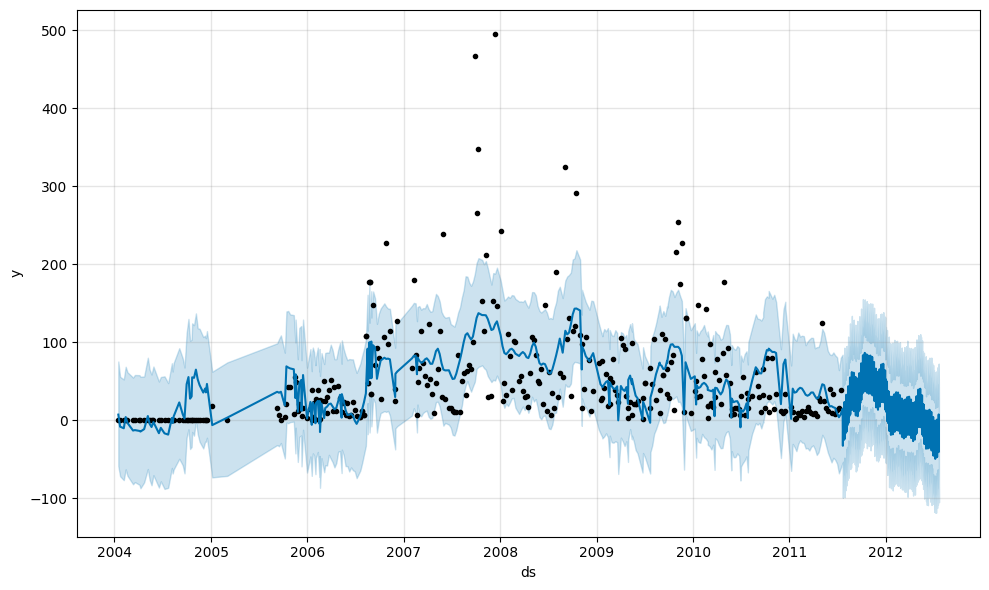

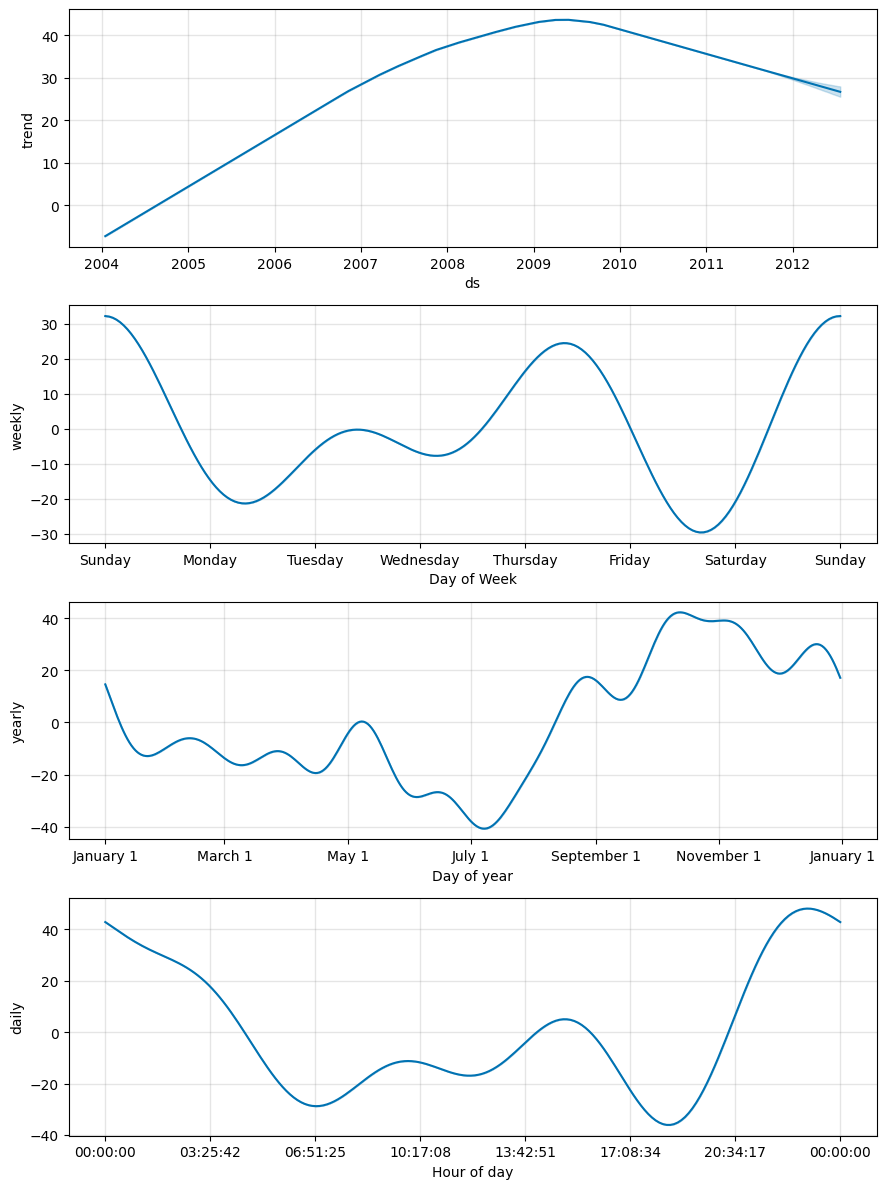

In [17]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [18]:
forecast2 = m2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
697,2012-07-16 10:10:00,106.998929,17.053521,198.165899
698,2012-07-17 10:10:00,94.442391,4.335044,176.005182
699,2012-07-18 10:10:00,153.681204,70.689645,239.728809
700,2012-07-19 10:10:00,92.095637,7.899287,182.385183
701,2012-07-20 10:10:00,125.528381,41.169532,209.255387


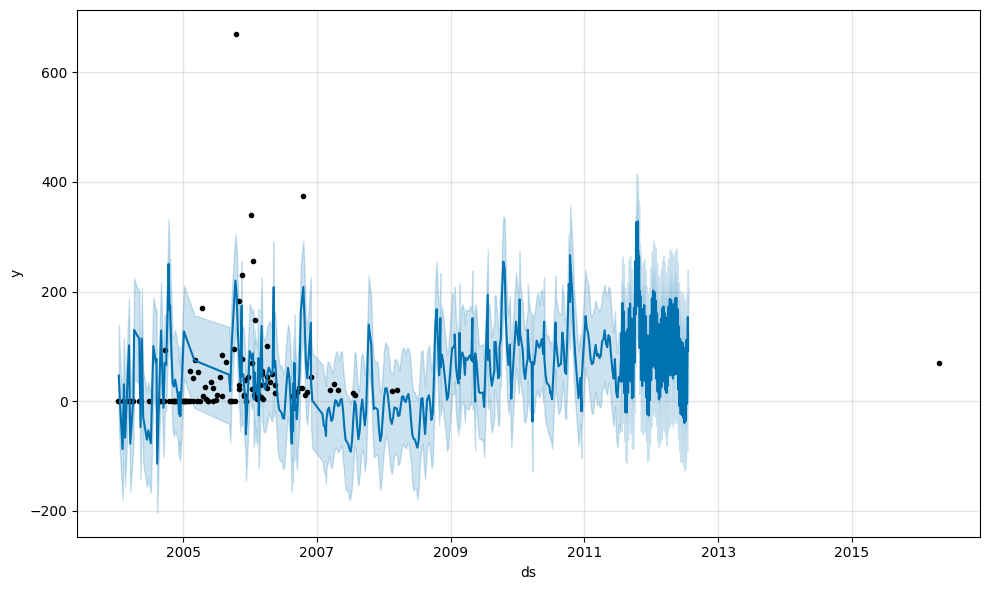

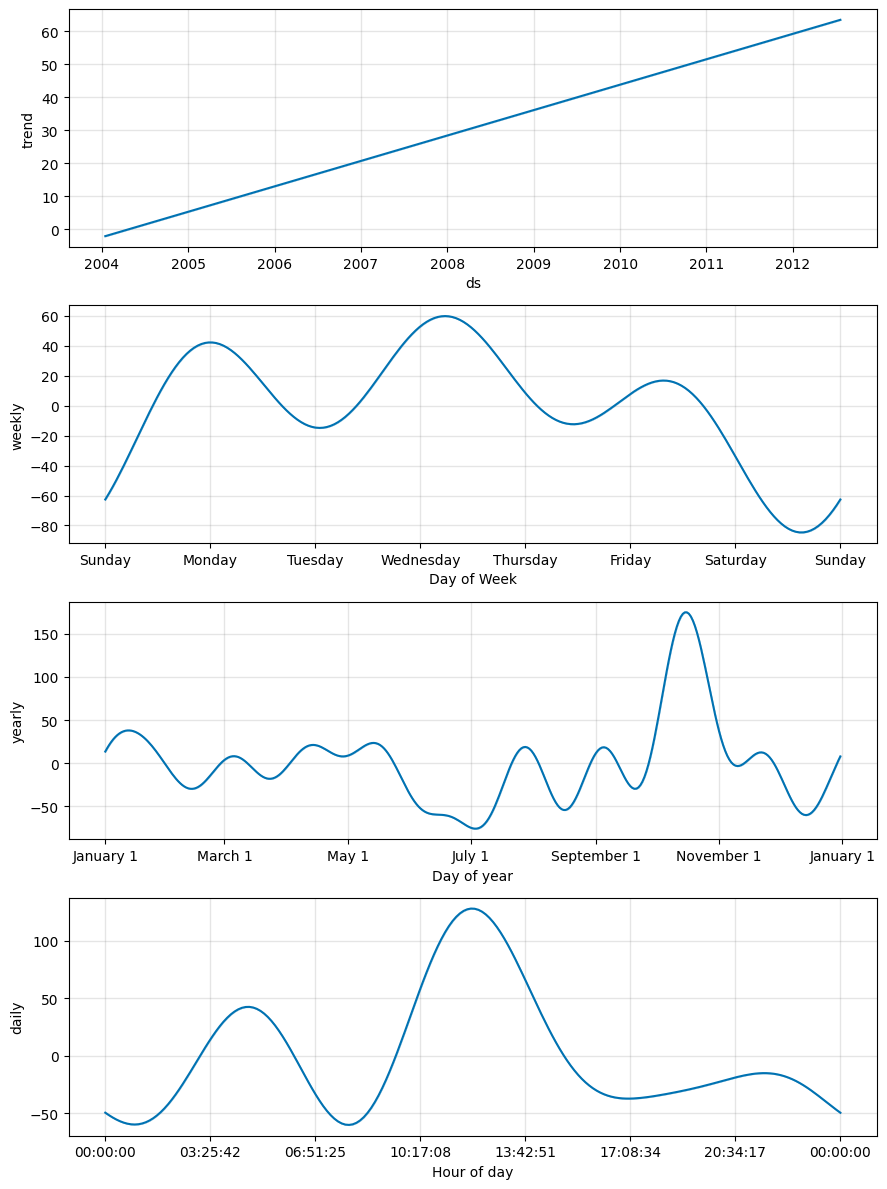

In [19]:
fig3 = m2.plot(forecast2)
fig4 = m2.plot_components(forecast2)

In [20]:
forecast3 = m3.predict(future)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
697,2012-07-16 10:10:00,13.191518,-0.131157,26.484063
698,2012-07-17 10:10:00,17.930539,4.358644,31.852034
699,2012-07-18 10:10:00,32.472044,19.674032,47.281279
700,2012-07-19 10:10:00,58.035087,44.661402,71.718064
701,2012-07-20 10:10:00,-177.170019,-191.424834,-163.275960


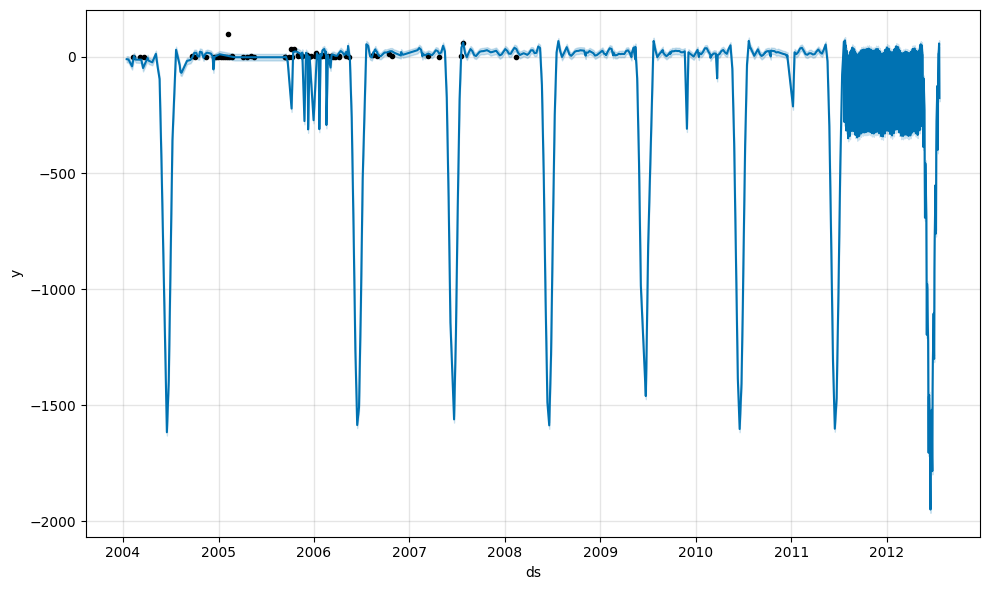

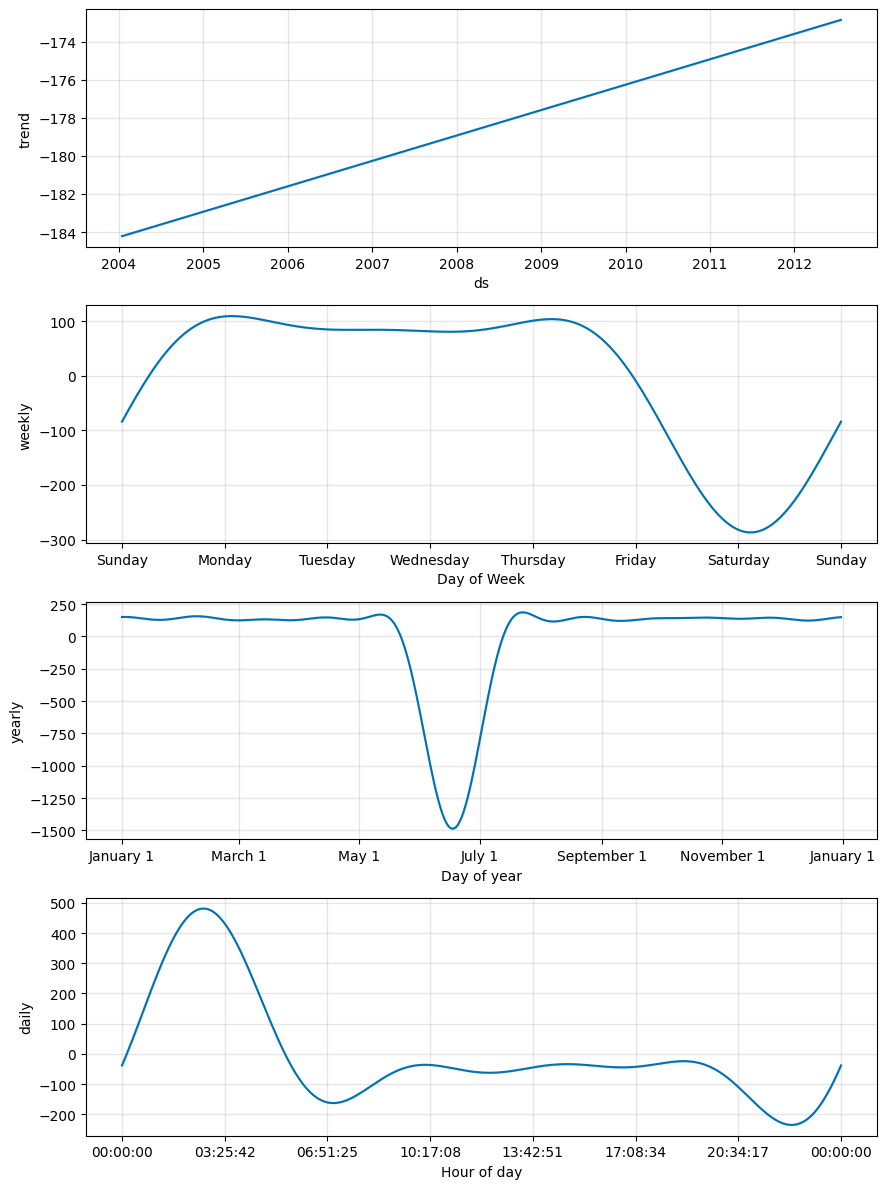

In [21]:
fig5 = m3.plot(forecast3)
fig6 = m3.plot_components(forecast3)